In [75]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
import glob
import tensorflow as tf
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Q1

In [78]:
size = [4, 8, 16, 32, 64]
val = np.array([752.0145263671875, 3590.223876953125, 4067.660888671875, 4265.69677734375, 4538.8916015625])
std = np.array([508.9709777832031, 1511.866943359375, 666.7880249023438, 803.4224243164062, 79.895881652832])

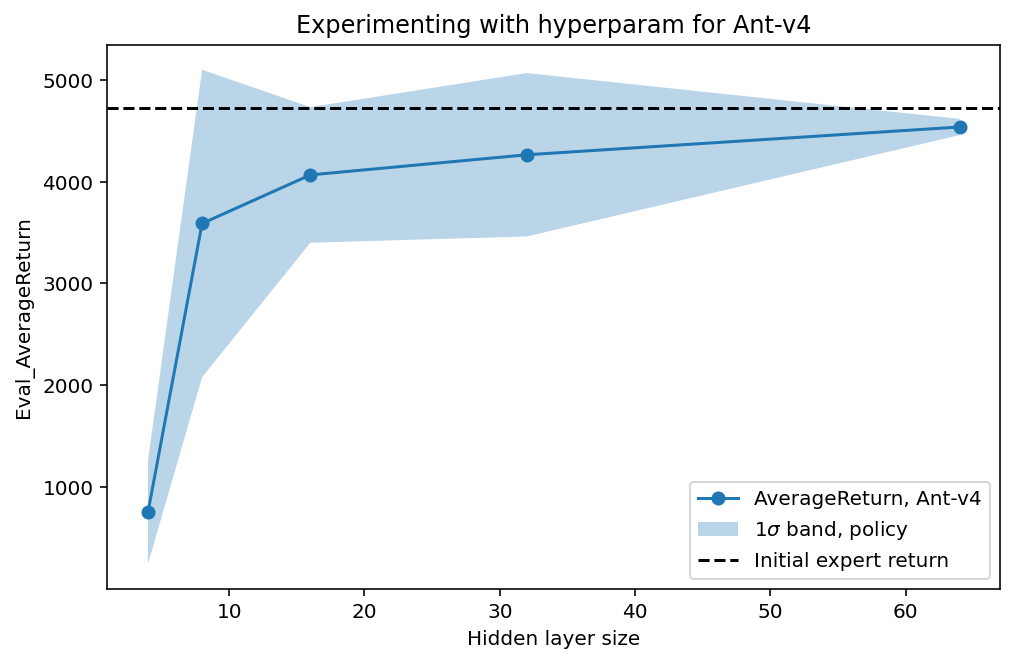

In [79]:
plt.figure(figsize=(8,5))
plt.plot(size, val, 'o-', label='AverageReturn, Ant-v4')
plt.fill_between(size, val-std, val+std, alpha=0.3, label=r'1$\sigma$ band, policy')
plt.axhline(4725.849609375, color='black', linestyle='--', label='Initial expert return')
plt.legend()
plt.xlabel('Hidden layer size')
plt.ylabel('Eval_AverageReturn')
plt.title('Experimenting with hyperparam for Ant-v4')
# plt.yscale('log')
plt.show()

# Q2

In [82]:
def plot_dagger_performance(exp, dir):

    data = EventAccumulator(f'data/{dir}/')
    data.Reload()
    # print(data.Tags())

    ''' load results '''

    time, step, Eval_AverageReturn = zip(*data.Scalars('Eval_AverageReturn'))
    _, _, Eval_StdReturn = zip(*data.Scalars('Eval_StdReturn'))
    _, _, Train_AverageReturn = zip(*data.Scalars('Train_AverageReturn'))
    _, _, Train_StdReturn = zip(*data.Scalars('Train_StdReturn'))
    Initial_DataCollection_AverageReturn = data.Scalars('Initial_DataCollection_AverageReturn')[0].value

    Eval_AverageReturn = np.array(Eval_AverageReturn)
    Eval_StdReturn = np.array(Eval_StdReturn)
    Train_AverageReturn = np.array(Train_AverageReturn)
    Train_StdReturn = np.array(Train_StdReturn)

    ''' make plot '''

    plt.figure(figsize=(8,5))
    plt.plot(step, Eval_AverageReturn, 'o-', label='AverageReturn, policy')
    plt.plot(step, Train_AverageReturn, 'o-', label='AverageReturn, expert')
    plt.fill_between(step, Eval_AverageReturn-Eval_StdReturn, Eval_AverageReturn+Eval_StdReturn, alpha=0.3, label=r'1$\sigma$ band, policy')
    plt.fill_between(step, Train_AverageReturn-Train_StdReturn, Train_AverageReturn+Train_StdReturn, alpha=0.3, label=r'1$\sigma$ band, expert')
    plt.axhline(Initial_DataCollection_AverageReturn, color='black', linestyle='--', label='Initial expert return')
    plt.legend()
    plt.xlabel('Iteration')
    plt.ylabel('Eval_AverageReturn')
    plt.title(f'{exp}, with DAgger')
    # plt.yscale('log')
    plt.show()

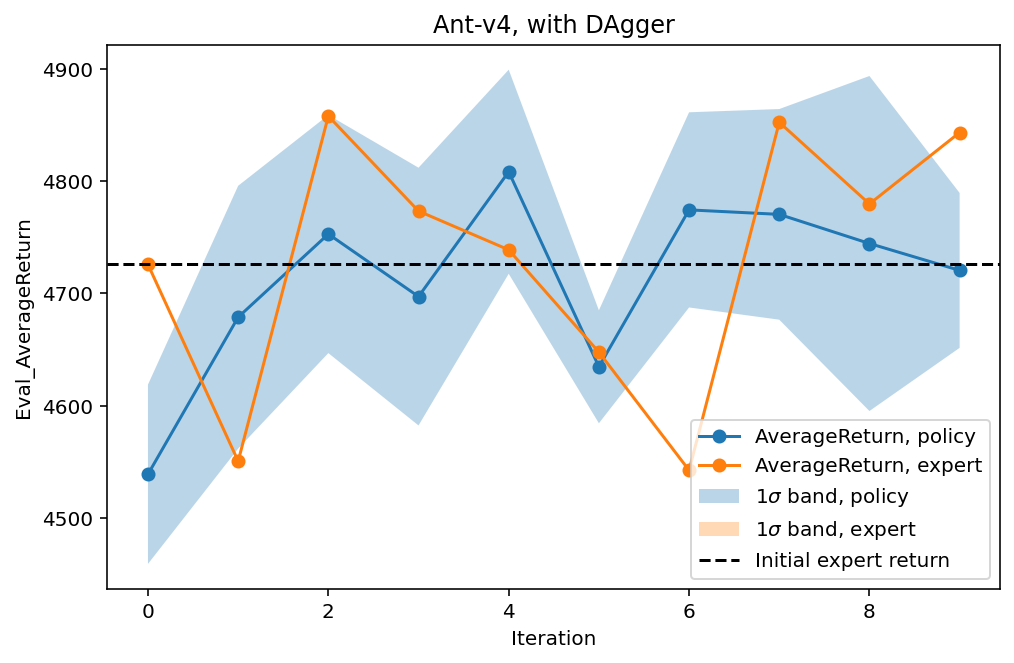

In [86]:
plot_dagger_performance('Ant-v4', 'q2_dagger_ant_Ant-v4_04-09-2022_01-46-15')

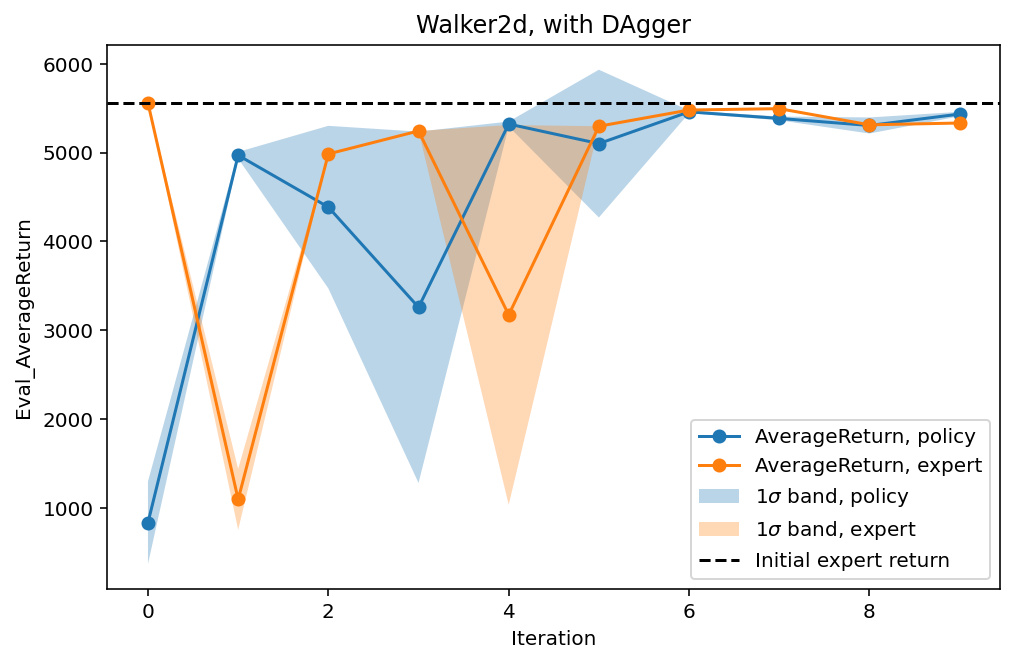

In [85]:
plot_dagger_performance('Walker2d', 'q2_dagger_walker_Walker2d-v4_04-09-2022_00-49-45')